# boostcourse_tensorflow2.0_dnn_project

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install tensorflow==2.0

In [0]:
import os
from pathlib import Path

folder = ""
project_dir = "Deep_learning/01_dnn_tf"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"현재 위치: {os.getcwd()}")

현재 위치: /content/drive/My Drive/Deep_learning/01_dnn_tf


## 1. Package load

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import check_util.checker as checker 
from IPython.display import clear_output

import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import np_utils

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 2.2.0-rc3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: False


Using TensorFlow backend.


## 2. 하이퍼파라미터 세팅

In [0]:
batch_size = 128
max_epochs = 25
learning_rate = 0.001
num_classes = 10

In [0]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape([-1, 28 * 28])
train_data = train_data.astype(np.float32)
train_labels_raw=train_labels
train_labels=np_utils.to_categorical(train_labels,10)




test_data = test_data / 255.
test_data = test_data.reshape([-1, 28 * 28])
test_data = test_data.astype(np.float32)
test_labels_raw=test_labels
test_labels=np_utils.to_categorical(test_labels,10)


# 3. Data set

In [0]:
# for train
N = len(train_data)

## 코드 시작 ##
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_labels))
train_dataset = train_dataset.shuffle(100000)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat(max_epochs)
## 코드 종료 ##

print(train_dataset)


# for test
## 코드 시작 ##
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_labels))
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat(max_epochs)
## 코드 종료 ##

print(test_dataset)

<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>
<RepeatDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>


## 4. 데이터 샘플 시각화

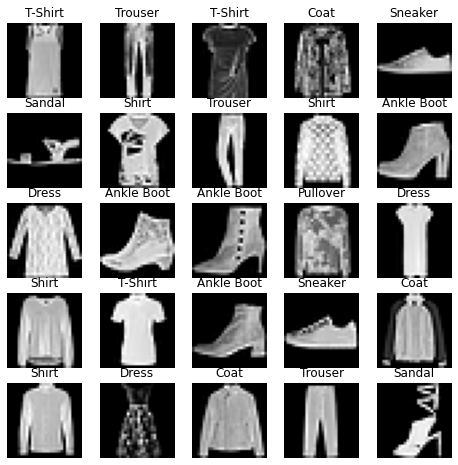

In [0]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 모델 (네트워크) 만들기

In [0]:
input_size = 784
batch_size = 100    
hidden_neurons = 400    
epochs = 30

In [0]:
model = tf.keras.Sequential() # Sequential 모델 생성

In [0]:
model.add(tf.keras.layers.Dense(hidden_neurons, input_dim=input_size)) 
model.add(tf.keras.layers.Activation('relu'))     
model.add(tf.keras.layers.Dense(classes, input_dim=hidden_neurons)) 
model.add(tf.keras.layers.Activation('softmax'))

### 데이터의 일부를 넣어서 model 체크 & summary

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
activation_6 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


## 6. Loss function 및 Optimizer 정의

In [0]:
# model compile with optimizer, loss, metrics
## 코드 시작 ##
model.compile(optimizer = tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              
              metrics=["accuracy"]
              )
## 코드 종료 ##

## 7. Training

In [0]:
## 코드 시작 ##
model.fit(train_data, train_labels, 
          batch_size=batch_size, 
          epochs=epochs, verbose=1)
## 코드 종료 ##

Epoch 1/30
600/600 [==============================] - 3s 5ms/step - loss: 0.4991 - accuracy: 0.8257
Epoch 2/30
600/600 [==============================] - 3s 6ms/step - loss: 0.3735 - accuracy: 0.8662
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.3340 - accuracy: 0.8790
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.3048 - accuracy: 0.8884
Epoch 5/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2861 - accuracy: 0.8948
Epoch 6/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2713 - accuracy: 0.8996
Epoch 7/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2586 - accuracy: 0.9045
Epoch 8/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2489 - accuracy: 0.9079
Epoch 9/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2401 - accuracy: 0.9101
Epoch 10/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2269 - accuracy: 0.9160

In [0]:
score = model.evaluate(test_data,test_labels, verbose=1)
print('\n''Test accuracy:', score[1]) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8909

Test accuracy: 0.8909000158309937


옵티마이저를 변경해서 다시 모델 피팅

In [0]:
model2 = Sequential()     
model2.add(Dense(hidden_neurons, input_dim=input_size)) 
model2.add(Activation('relu'))     
model2.add(Dense(classes, input_dim=hidden_neurons)) 
model2.add(Activation('softmax'))
 
model2.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')
model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=1)
 
###5.Test 
score = model2.evaluate(train_data, train_labels, verbose=1)
print('\n''Test accuracy:', score[1]) 

Epoch 1/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.5545 - accuracy: 0.8032
Epoch 2/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.3932 - accuracy: 0.8578
Epoch 3/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.3490 - accuracy: 0.8728
Epoch 4/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.3225 - accuracy: 0.8809
Epoch 5/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.3019 - accuracy: 0.8885
Epoch 6/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.2868 - accuracy: 0.8930
Epoch 7/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.2735 - accuracy: 0.8989
Epoch 8/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.2621 - accuracy: 0.9025
Epoch 9/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.2518 - accuracy: 0.9056
Epoch 10/30
60000/60000 [==============================

Test accuracy: 0.955299973487854

다른 모델 생성

In [0]:
## 코드 시작 ##
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,),kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(256,kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(128,kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())


model.add(tf.keras.layers.Dense(64,kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())


model.add(tf.keras.layers.Dense(32,kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())


model.add(tf.keras.layers.Dense(10,activation='softmax'))
## 코드 종료 ##

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [0]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              
              metrics=["accuracy"]
              )

In [0]:
model.fit(train_data, train_labels, 
          batch_size=batch_size, 
          epochs=epochs, verbose=1)

Epoch 1/30
600/600 [==============================] - 8s 13ms/step - loss: 0.5970 - accuracy: 0.8030
Epoch 2/30
600/600 [==============================] - 8s 13ms/step - loss: 0.4096 - accuracy: 0.8519
Epoch 3/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3723 - accuracy: 0.8639
Epoch 4/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3469 - accuracy: 0.8734
Epoch 5/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3305 - accuracy: 0.8798
Epoch 6/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3126 - accuracy: 0.8856
Epoch 7/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3024 - accuracy: 0.8889
Epoch 8/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2955 - accuracy: 0.8911
Epoch 9/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2825 - accuracy: 0.8948
Epoch 10/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2740 - accura

In [0]:
#loss,accuracy = model.evaluate(test_dataset, steps = len(test_data)//batch_size)
score = model.evaluate(test_data,test_labels, verbose=1)
print('\n''Test accuracy:', score[1]) 


313/313 [==============================] - 1s 3ms/step - loss: 0.3140 - accuracy: 0.8961

Test accuracy: 0.8960999846458435


### output 확인하기

In [0]:
model.predict(tf.reshape(train_data[0], (1,-1)))

array([[1.4609826e-07, 6.8663006e-08, 3.1733605e-10, 9.9999952e-01,
        5.6660085e-08, 1.2989429e-07, 9.2201120e-08, 3.2078304e-09,
        6.4789818e-09, 2.4772890e-08]], dtype=float32)

In [0]:
list(test_labels[batch_index])#.index(1)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0

학습된 모델의 예측 결과를 시각화. label이 <font color='blue'>파란색</font>으로 표시되면 모델이 정확한 예측을 한 것이고 <font color='red'>빨간색</font>으로 표시되면 틀린 예측

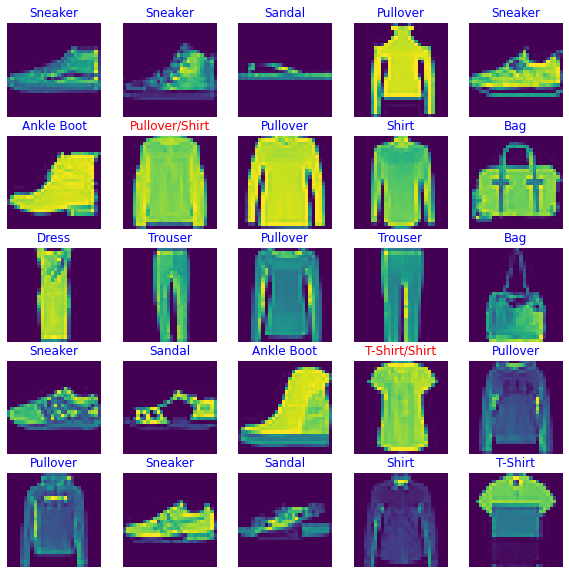

In [0]:
test_batch_size = 25
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels_raw[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')